In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
img = cv2.imread('images/evening.jpg')

In [4]:
print(img.shape, cv2.split(img))


(3294, 5002, 3) (array([[59, 59, 59, ..., 67, 67, 67],
       [59, 59, 59, ..., 67, 67, 67],
       [59, 60, 60, ..., 67, 67, 67],
       ...,
       [60, 60, 60, ..., 60, 63, 63],
       [60, 60, 60, ..., 62, 62, 62],
       [60, 60, 60, ..., 62, 62, 62]], dtype=uint8), array([[43, 43, 43, ..., 47, 46, 46],
       [43, 43, 43, ..., 47, 46, 46],
       [43, 44, 44, ..., 47, 46, 46],
       ...,
       [44, 44, 44, ..., 44, 45, 45],
       [44, 44, 44, ..., 44, 44, 44],
       [44, 44, 44, ..., 44, 44, 44]], dtype=uint8), array([[27, 27, 27, ..., 30, 31, 31],
       [27, 27, 27, ..., 30, 31, 31],
       [27, 28, 28, ..., 30, 31, 31],
       ...,
       [28, 28, 28, ..., 27, 28, 28],
       [28, 28, 28, ..., 27, 27, 27],
       [28, 28, 28, ..., 27, 27, 27]], dtype=uint8))


In [5]:
r, g, b = cv2.split(img)

In [6]:
pca = PCA(20)

r_transformed = pca.fit_transform(r)
r_inverted    = pca.inverse_transform(r_transformed)

g_transformed = pca.fit_transform(g)
g_inverted    = pca.inverse_transform(g_transformed)

b_transformed = pca.fit_transform(b)
b_inverted    = pca.inverse_transform(b_transformed)

rgb = (
    r_inverted, 
    g_inverted,
    b_inverted
)

In [7]:
compressed_img = (np.dstack(rgb)).astype(np.uint8)

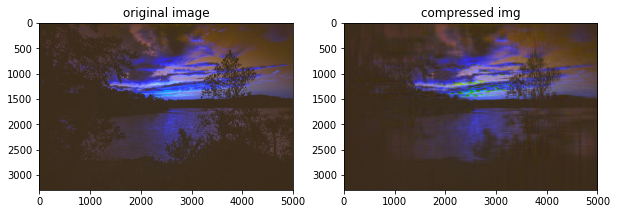

In [8]:
plt.figure(figsize = (10, 20))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title('compressed img')
plt.imshow(compressed_img)

plt.show()